# 1. Introduction Project Objective:
Predict whether a donor will donate blood in March 2007 based on historical donation behavior.

# 2.  Data Loading & Initial Inspection

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")

In [3]:
train_data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


# 3. Data Cleaning & Preprocessing

# 3.1 Drop Unused Column

In [5]:
if 'Unnamed: 0' in train_data.columns:
    train_data = train_data.drop(columns=['Unnamed: 0'])

In [24]:
train_data.head()

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation_in_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# 3.2 Check for Missing Values

In [6]:
train_data.isnull().sum()

Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

# 3.3 Rename Columns for Clarity

In [7]:
train_data.columns = [
    'Months_since_Last_Donation',
    'Number_of_Donations',
    'Total_Volume_Donated',
    'Months_since_First_Donation',
    'Made_Donation_in_March_2007'
]

# 3.4 Data Types

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months_since_Last_Donation   576 non-null    int64
 1   Number_of_Donations          576 non-null    int64
 2   Total_Volume_Donated         576 non-null    int64
 3   Months_since_First_Donation  576 non-null    int64
 4   Made_Donation_in_March_2007  576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


# 4. Exploratory Data Analysis (EDA)

# 4.1 Summary Statistics

In [10]:
train_data.describe()

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation_in_March_2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# 4.2 Target Variable Distribution

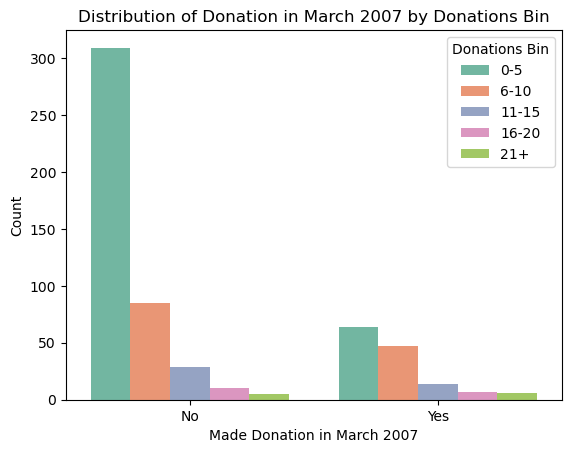

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data['Donations_bin'] = pd.cut(train_data['Number_of_Donations'],bins=[0, 5, 10, 15, 20, train_data
['Number_of_Donations'].max()],labels=['0-5', '6-10', '11-15', '16-20', '21+'])

sns.countplot(data=train_data,x='Made_Donation_in_March_2007',hue='Donations_bin',palette='Set2')
plt.title('Distribution of Donation in March 2007 by Donations Bin')
plt.xlabel('Made Donation in March 2007')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.legend(title='Donations Bin')
plt.show()

Observation: Dataset is imbalanced, majority donors didn’t donate in March 2007.

# 4.3 Pairplot to Check Relations

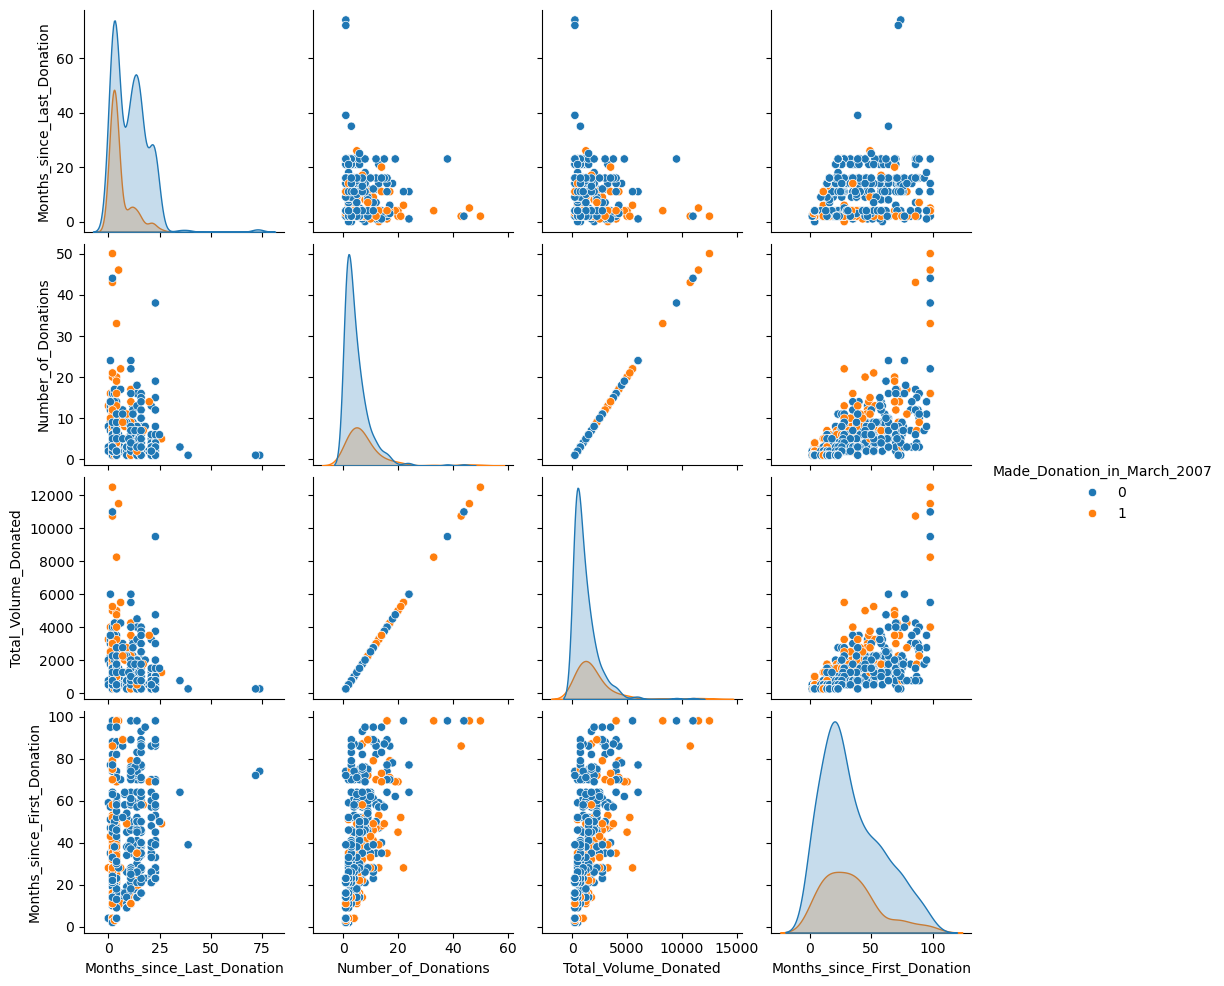

In [14]:
sns.pairplot(train_data, hue='Made_Donation_in_March_2007')
plt.show()

# 5. Correlation Heatmap

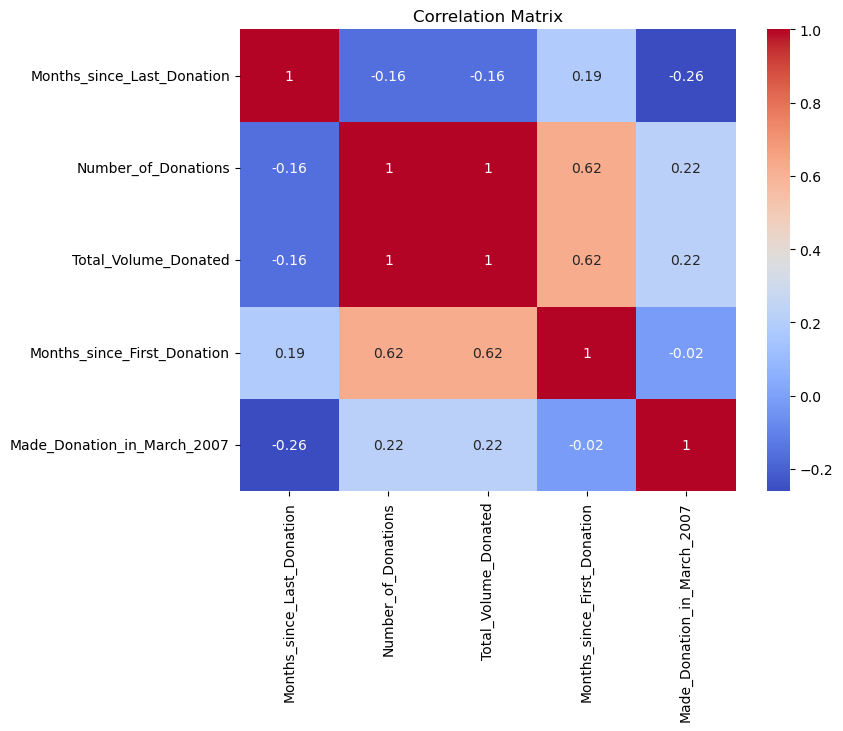

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Note: Total Volume Donated is directly correlated with Number of Donations (because Total Volume = 250 × No. of donations).

# 6. Data Preparation

# 6.1 Drop Redundant Features

In [16]:
X = train_data.drop(columns=['Total_Volume_Donated', 'Made_Donation_in_March_2007'])
y = train_data['Made_Donation_in_March_2007']

# 6.2 Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Modeling & Model Comparison

# Models to Compare
Logistic Regression

Decision Tree Classifier

Random Forest Classifier

XGBoost Classifier

K-Nearest Neighbors

# 7.1 Train Models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(eval_metric='logloss'),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 60)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        88
           1       0.62      0.18      0.28        28

    accuracy                           0.78       116
   macro avg       0.71      0.57      0.57       116
weighted avg       0.75      0.78      0.73       116

[[85  3]
 [23  5]]
------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        88
           1       0.29      0.29      0.29        28

    accuracy                           0.66       116
   macro avg       0.53      0.53      0.53       116
weighted avg       0.66      0.66      0.66       116

[[68 20]
 [20  8]]
------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        88
        

# 8. Model Comparison Plot

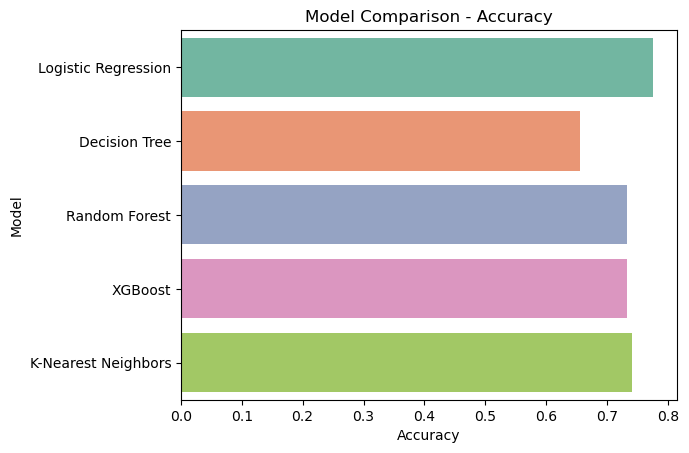

In [22]:
sns.barplot(data=results_df,x='Accuracy',y='Model',hue='Model',dodge=False,palette='Set2',legend=False)
plt.title('Model Comparison - Accuracy')
plt.show()

# Challenges Faced & Techniques Used

Challenges: How to see unused columns, unnamed and missing values.
Techniques used: I drop the unused columns and rename the Unnamed column. There are no missing values as such, I did not apply any technique.  
